## Overview:
The data set for this project has been taken from Kaggle. The data set is simple. This project aims at predicting weight of the fishes.

## Dataset:
Fish market : Database of common fish species for fish market<br>
https://www.kaggle.com/datasets/aungpyaeap/fish-market

## Step 01: Import all the required Libraries

Let's load the necessary libraries and data and start coding.

- <strong>NumPy</strong> : stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.
- <strong>Pandas</strong> : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- <strong>Sklearn</strong> : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- <strong>Pickle</strong> : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- <strong>Matplotlib</strong> : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- <strong>Seaborn</strong> : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')

## Step 02: Read all the required Data
In this stage we are going to read our problem dataset and have a look on it.

In [2]:
# Loading the data in pandas dataframe
try: 
    fish_data = pd.read_csv('Data/Fish_Data.csv')
    print("Data Reading Done Successfully....")
    
except (FileNotFoundError, IOError):
    print("Wrong File or File path")

Data Reading Done Successfully....


After we read the data, we can look at the data using:

In [3]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish_data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


## Step 03: Data Exploration
Now we explore the data using different techniques..

In [5]:
# Checking the rows and columns of the dataset
print (f'The train data has {fish_data.shape[0]} rows and {fish_data.shape[1]} columns')

The train data has 159 rows and 7 columns


In [6]:
# Getting more insights of the data using .info() method
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
# Statistic of the dataset
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


#### Let's check if the data set has any missing values.

In [8]:
# Chcek Missing values
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

As we can see there is no missing value present in the dataset

#### Now let's chcek the distribution of the target varibale

In [9]:
# Function for Q-Q plot to chcek wether the target feature is normally distributed or not
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist='norm', plot=pylab)

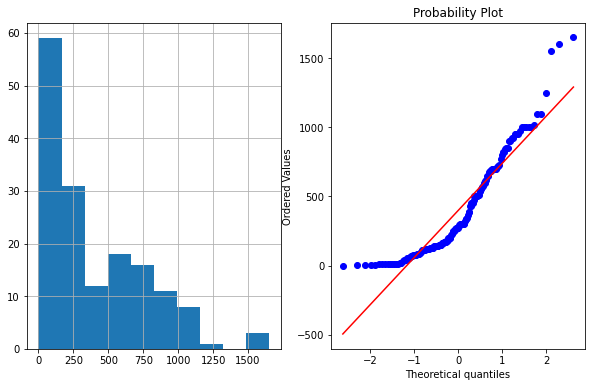

In [10]:
plot_data(fish_data, 'Weight')

As we can see in Q-Q plot, the data is not properly distributed with the linw.

<AxesSubplot:xlabel='Weight', ylabel='Count'>

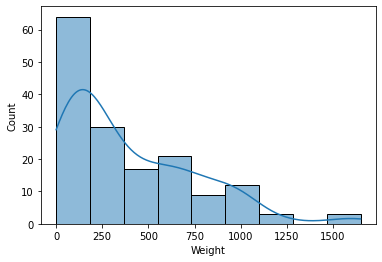

In [11]:
sns.histplot(fish_data['Weight'], kde=True)

In [12]:
#skewness
print(f"The skewness of Fish Weight feature is {fish_data['Weight'].skew()}")

The skewness of Fish Weight feature is 1.1044503929261893


We see that the target variable Weight has a right-skewed distribution. We'll need to transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables.

In [13]:
# Squared root Transformation
fish_data['Weight sqrt'] = np.sqrt(fish_data['Weight'])

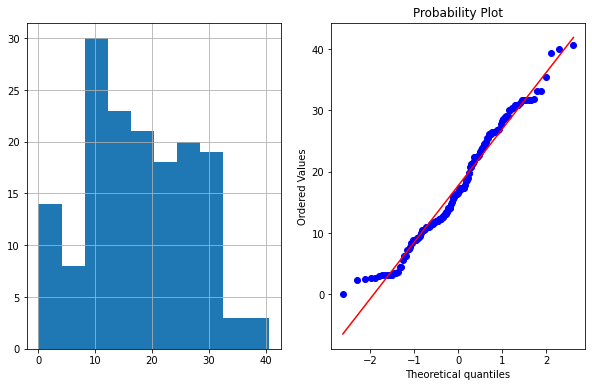

In [14]:
plot_data(fish_data, 'Weight sqrt')

Here in Q-Q plot, the data is distributed linearly with the line.

Skewness is 0.2277490658754433


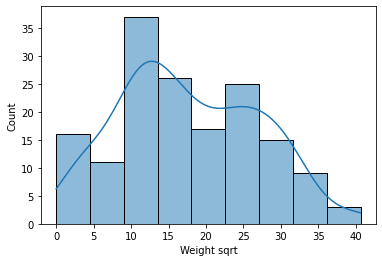

In [15]:
sns.histplot(fish_data['Weight sqrt'], kde=True)
print ('Skewness is', fish_data['Weight sqrt'].skew())

In [16]:
# Now drop the Weight feature because we don't need this column anymore.
fish_data.drop(columns=['Weight'], inplace=True)

In [17]:
fish_data.head()

,Species,Length1,Length2,Length3,Height,Width,Weight sqrt
0,Bream,23.2,25.4,30.0,11.5200,4.0200,15.556349
1,Bream,24.0,26.3,31.2,12.4800,4.3056,17.029386
2,Bream,23.9,26.5,31.1,12.3778,4.6961,18.439089
3,Bream,26.3,29.0,33.5,12.7300,4.4555,19.052559
4,Bream,26.5,29.0,34.0,12.4440,5.1340,20.736441


After applying Squared root tranformation, the data is like to be normally distributed.

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

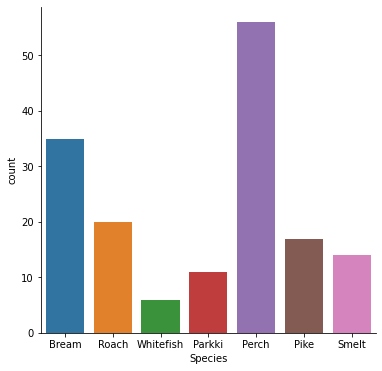

In [18]:
# Exploring Species Feature
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(x='Species', data=fish_data)
sns.despine()
fish_data['Species'].value_counts()

The perch fish has the highest fregquency.

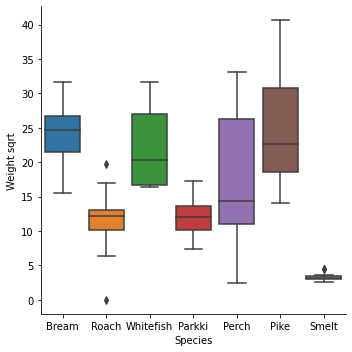

In [19]:
# Categrical plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.catplot(x='Species', y='Weight sqrt', data=fish_data, kind="box")

The Pike fish has the highest weight followed by the Perch fish.

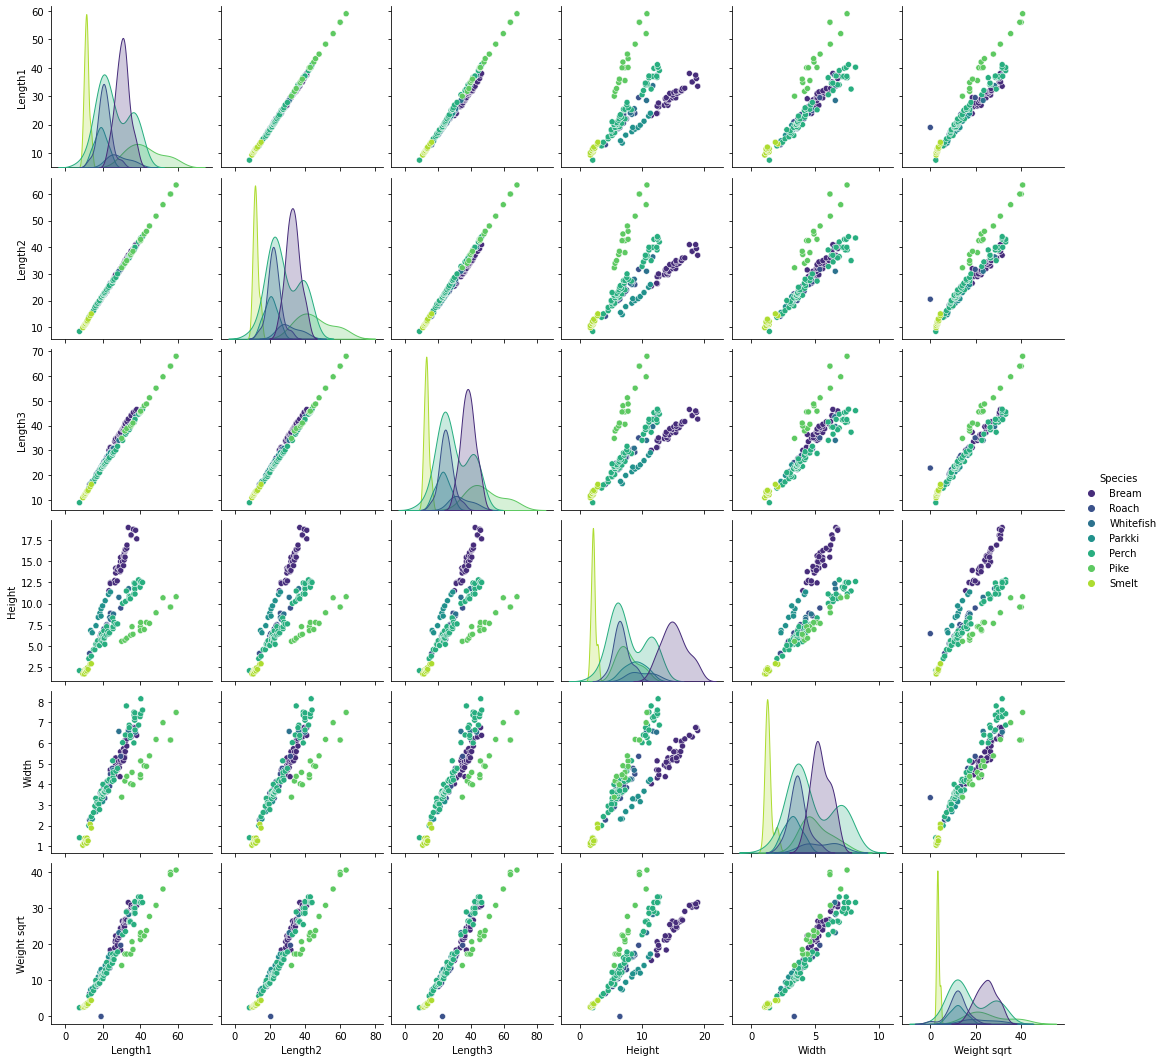

In [20]:
# Ploting pairplot
sns.pairplot(fish_data, hue='Species', palette='viridis')

Here we can observed that most of the features are shown linear relationship with the target feature

<AxesSubplot:>

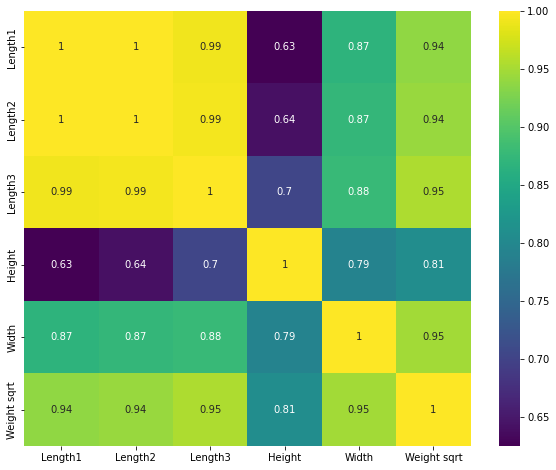

In [21]:
# Correlation map to check multicolinearity
plt.rcParams['figure.figsize'] = (10.0, 8.0)
corr = fish_data.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

In this plot, we can see that independent feature Length, Length2 and Length3 are highly correlated which means that these three features are multicolinear. So we need to drop any two features to prevent overfitting.

In [22]:
# Drop Length2 and Length3 feature because these features are shows multicolinearity with feature Length1
fish_data.drop(columns=['Length2', 'Length3'], inplace=True)

In [23]:
fish_data.head()

,Species,Length1,Height,Width,Weight sqrt
0,Bream,23.2,11.5200,4.0200,15.556349
1,Bream,24.0,12.4800,4.3056,17.029386
2,Bream,23.9,12.3778,4.6961,18.439089
3,Bream,26.3,12.7300,4.4555,19.052559
4,Bream,26.5,12.4440,5.1340,20.736441


## Step 04: Data Pre-Processing
Make data ready for Machine Learning model...

In [24]:
# Encoding Categorical Data
encoder = LabelEncoder()
Encoded_Species = encoder.fit_transform(fish_data['Species'])
fish_data['Encoded_Species'] = Encoded_Species

In [25]:
# check the encoding categorical Data
fish_data.head()

,Species,Length1,Height,Width,Weight sqrt,Encoded_Species
0,Bream,23.2,11.5200,4.0200,15.556349,0
1,Bream,24.0,12.4800,4.3056,17.029386,0
2,Bream,23.9,12.3778,4.6961,18.439089,0
3,Bream,26.3,12.7300,4.4555,19.052559,0
4,Bream,26.5,12.4440,5.1340,20.736441,0


In [26]:
# Drop unnessary features
fish_data.drop(columns=['Species'], inplace = True)

In [27]:
fish_data.head()

,Length1,Height,Width,Weight sqrt,Encoded_Species
0,23.2,11.5200,4.0200,15.556349,0
1,24.0,12.4800,4.3056,17.029386,0
2,23.9,12.3778,4.6961,18.439089,0
3,26.3,12.7300,4.4555,19.052559,0
4,26.5,12.4440,5.1340,20.736441,0


In [28]:
# Separate the other features and the target fetaures
X = fish_data[['Length1', 'Height', 'Width', 'Encoded_Species']]

In [29]:
y = fish_data['Weight sqrt']

In [30]:
X.head()

,Length1,Height,Width,Encoded_Species
0,23.2,11.5200,4.0200,0
1,24.0,12.4800,4.3056,0
2,23.9,12.3778,4.6961,0
3,26.3,12.7300,4.4555,0
4,26.5,12.4440,5.1340,0


In [31]:
y

0      15.556349
1      17.029386
2      18.439089
3      19.052559
4      20.736441
         ...    
154     3.492850
155     3.660601
156     3.492850
157     4.438468
158     4.460942
Name: Weight sqrt, Length: 159, dtype: float64

## Step 5: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.

- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [32]:
# Splitting the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
#display the shapes of the x and y train and test dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(119, 4) (40, 4) (119,) (40,)


## Step 6: Train the Model using Linear Regression 

In [34]:
# Creating the instance of the Linear regression
lin_reg = LinearRegression()

In [35]:
# Train the model
lin_reg.fit(X_train, y_train)
print("Training is done successfully..")

Training is done successfully..


In [36]:
# Tesing the accuracy score of the model
print(f"The accuracy score of the model is: {round(lin_reg.score(X_test, y_test), 2)*100}%")

The accuracy score of the model is: 98.0%


In [37]:
# make prediction on test data
y_pred = lin_reg.predict(X_test)
y_pred

array([ 8.84337768,  2.00996363, 16.04547321, 15.98308909, 11.78227432,
       29.69975516,  0.66627139, 14.61471244, 14.24344493, 35.59367485,
       24.7489179 , 28.59745877, 24.18646692, 11.68371604, 25.8346568 ,
       29.47839326, 32.61732324, 15.60713709, 13.47130009, 23.89188603,
        1.7303487 , 24.26434612, 21.14148106, 22.08408332, 29.47743913,
       31.28748372, 12.72231317, 16.11479742,  0.10484646,  1.52964603,
       23.45141345,  7.68709719,  6.81611372, 26.21124223, 18.44655807,
       11.35927516, 12.91179573, 11.01700129, 12.56287089, 29.40823227])

In [38]:
# Saving the result
result = pd.DataFrame({'y_test':np.array(y_test).reshape(len(y_test)), 'y_pred':y_pred}, index=range(len(y_pred)))
result.y_pred = result.y_pred.apply(lambda x: round(x**2,1))
result.y_test = result.y_test.apply(lambda x: round(x**2,1))
result.to_csv('Fishes Weight prediction model result.csv')

## Step 7: Save the model in a pickle file
As model is giving very good accuracy we'll go with it and save it to pickle file. We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream.

In [39]:
# Save the model to disk
pickle.dump(lin_reg, open('Fishes Weight Prediction model.pickle', 'wb'))

## Summary
Now our model is ready and whenever we need to make prediction, we just load the model using pickle and make the predictions.